In [4]:
from selenium import webdriver
from bs4 import BeautifulSoup
from collections import defaultdict
import time
import datetime
import os
import json
from krwordrank.word import KRWordRank
from wordcloud import WordCloud


FIND_NUM = 1                                   # 탐색하고자 하는 횟수, 개당 20게 게시물
YOUR_ID = ' '                            # 에브리타임 아이디
YOUR_PASSWORD = ' '                      # 에브리타임 비밀번호
BOARD_URL = 'https://everytime.kr/370451/p/'   # 에브리타임 해당 학교 자유게시판 주소
def tree(): 
    return defaultdict(tree)

driver = webdriver.Chrome('./chromedriver.exe')
driver.implicitly_wait(10)
driver.get('https://everytime.kr/login')

# 접속
driver.find_element_by_xpath('//*[@id="container"]/form/p[1]/input').send_keys(YOUR_ID)   # 아이디
driver.find_element_by_xpath('//*[@id="container"]/form/p[2]/input').send_keys(YOUR_PASSWORD)   # 비밀번호
driver.find_element_by_xpath('//*[@id="container"]/form/p[3]/input').click()                # 로그인 버튼
time.sleep(2)
driver.find_element_by_xpath('//*[@id="container"]/div[4]/div[1]/div/h3/a').click()          # 자유게시판 클릭

everytime_link = list() # 링크 리스트
fail_link = list() # 실패 리스트
page_number = 2
content_number = 0


if not os.path.isdir("./Result/"):
    os.mkdir("./Result/") 
    
for i in range(FIND_NUM):
    time.sleep(7)    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    content = soup.findAll('article')

    for url in content:
        find_url = url.find('a', attrs={'class', 'article'}).get('href')
        everytime_link.append(find_url)
    time.sleep(2)
    driver.get(BOARD_URL + str(page_number)) # 자유게시판
    page_number = page_number + 1

with open('./everytime_link.txt', 'w') as fileobject:
    for join_link in everytime_link:
        fileobject.write(join_link)
        fileobject.write('\n')



for url in everytime_link:
        
    time_now = datetime.datetime.now()      #현재 시간 저장
    json_data = dict()
    comment_text = list()
    comment_time = list()
    json_data['comment_text'] = list()
    json_data['comment_time'] = list()
    
    try:
        driver.get('https://everytime.kr' + url)
        time.sleep(5)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        # append 로 수정할것
        title = soup.find('h2', attrs={'class', 'large'}).get_text()
        text = soup.find('p', attrs={'class', 'large'}).get_text()
        text_time = soup.find('time', attrs={'class', 'large'}).get_text()
        try:
            comment = soup.findAll('article')

            for content in comment:
                comment_text.append(content.find('p').get_text())
                comment_time.append(content.find('time').get_text())
        except:
            pass                   #댓글없음
        
        
        json_data['title'] = title
        json_data['text'] = text
        json_data['tex_time'] = text_time
        json_data['now_time'] = str(time_now)
        
        json_data['comment_text'] = comment_text
        json_data['comment_time'] = comment_time
        
    except Exception as e:
        print(e)
        fail_link.append(url)
        continue

    with open('./Result/' + 'text' + str(content_number) + '.txt', 'w') as fileobject:
        json.dump(json_data, fileobject)
        content_number = content_number + 1
            
            
with open('./fail_url.txt', 'w') as fileobject:
    for join_link in fail_link:
        fileobject.write(join_link)
        fileobject.write('\n')
            
driver.close()

In [5]:
# https://wikidocs.net/39 참조

def search(dirname):        # 디렉토리 속 파일 경로 리스트 가져오기 ex : ./Result/file.txt
    file_name_list = list()
    filenames = os.listdir(dirname)
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        file_name_list.append(full_filename)
    return file_name_list

def file_read(file_name_list):  # json 으로 해당 경로 파일 가져오기
    data = list()
    for file_path in file_name_list:
        with open(file_path, 'r') as file_point:
            data.append(json.load(file_point))
    return data

In [6]:
file_list = search('./Result/')
data = file_read(file_list)

#print(file_list)
print(data[0].keys())
print(data[4]['title'])
print(data[0]['text'])

dict_keys(['comment_text', 'comment_time', 'title', 'text', 'tex_time', 'now_time'])
슴우들
잘 모르는데 알려주세요 ㅠ단순히 나중에 힘들다 이런거 말구요..


In [8]:
# https://lovit.github.io/nlp/2018/04/17/word_cloud/ 참조

wordrank_extractor = KRWordRank(
    min_count = 10, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 15, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

input_text = str()
text = list()
for content in data:
    text.append(content['text'])
    text.append(content['title'])
    
    for comment in content['comment_text']:
        text.append(comment)

input_text = ' '.join(text)

In [9]:
keywords = None
rank = ''
graph = None
keywords, rank, graph = wordrank_extractor.extract(text, beta, max_iter)

scan vocabs ... 
num vocabs = 41
done = 10


In [10]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:60]:
    print('%8s:\t%.4f' % (word, r))

      먹고:	1.8800
      모솔:	1.7402
      알바:	1.2492


In [27]:
print(keywords)
print(type(keywords))

{'내가': 7.012176508708188, '진짜': 6.93075013038038, '나도': 4.910207422493632, '그냥': 4.861219328446708, '사람': 4.829200900105935, '너무': 4.697183458735927, '삭제된': 4.450530220159293, '수업': 4.4019167810174125, 'ㅠㅠ': 3.4029258844898793, '같이': 3.3902133379531985, '전공': 3.276625512568155, '어떻게': 3.260149940531499, '아니': 3.209767616874798, 'ㅋㅋ': 3.192389984522214, '근데': 3.046539362817057, '지금': 2.829580858690222, '나는': 2.825688411907347, '혹시': 2.8200131749870567, '교수님': 2.7513053405165815, '이렇게': 2.625141511114593, '정말': 2.5675120481994655, '다들': 2.5447722087662097, '하는': 2.505828919010939, '많이': 2.4306451225729444, '우리': 2.308459439356643, '친구': 2.173523112528609, '있는': 2.0722989925224504, '하나': 2.0563669389677415, '계속': 2.0511486618097248, '그거': 2.0477789824878436, '서로': 2.0017966389198865, '싸강': 1.9992090831043061, '그런': 1.9531259517217379, '생각': 1.900297034301115, '들어': 1.887683295968917, '다른': 1.8732965467707472, '오늘': 1.8380557904874415, '연락': 1.8370599175843285, 'ㅜㅜ': 1.8203471555318749, '이

In [12]:
wordcloud = WordCloud(
    font_path = './NanumGothic.ttf',
    width = 1200,
    height = 1200,
    background_color="white"
)

# keywords.pop('삭제된')     # 이상한 값들 제거
# keywords.pop('댓글입니다.')
# keywords.pop('처리중입니다')

#wordcloud = wordcloud.generate_from_text(text)
wordcloud = wordcloud.generate_from_frequencies(keywords)

In [13]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())

In [14]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (, 800, 3)

<class 'numpy.ndarray'>
(1200, 1200, 3)


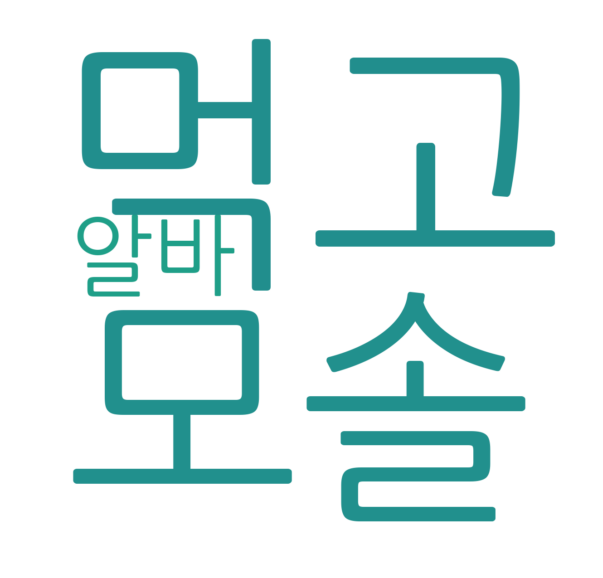

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.show()
# fig.savefig('자게3.png')  # 이미지 저장